---------------------
# Project: PCA and tSNE
- **Marks: 25**
--------------------

Dear Learner,
Welcome to the project on PCA and tSNE. In this project, we aim to generate and visualise the pca and tsne embeddings for iris flower(read more about the plant <a href = "https://en.wikipedia.org/wiki/Iris_(plant)">here</a>) dataset.

<br>

---------------------
## Background and about data
--------------------

We have learnt that PCA and tSNE can be used to represent a high dimensional data in lower dimesions thus enabling us to visualise the same.
The dataset used here is a classic dataset to study multiclass classification - Iris plant dataset. Every data science surely comes across this dataset in their journey and it has been subject for a lot of research as well. The data has 3 types of the iris flower -  
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

Four different features are described for these 3 types which are-

- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

<br>

-----------------------
## Objective
-------------------------

- The idea in this project is to read the data from sklearn.datasets, load it into a dataframe appropriately, do some basic data exploration and then visualize using the 2D embeddings from PCA and tSNE to check if the types are reflected well in these visualisations.


-------------------
## Guidelines
-------------------

- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed.
- You can raise your issues on the discussion forum on the Olympus.
You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them
- All the requirements have been numbered. You can treat them as question numbers. Marks are also added in the requirement statement.


--------------------
## Resources
---------------------

- Documentation PCA - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Documnetation tSNE - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html



### Import the required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Load the iris data from sklearn.datasets (2 marks)

In [3]:
# uncomment below

# from _________ import load_iris


from sklearn.datasets import load_iris
iris = load_iris()



In [4]:
# Uncomment below to know more about the dataset
# print(iris.DESCR)

print(iris.DESCR)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Now that we have loaded the data, let us extract the features, targets and feature names

iris_x = iris.data
iris_y = iris.target
column_names = iris.feature_names



### 2. Create the iris_df (3 marks)
- Using the values above, create a dataframe using the hints below.
- The final dataframe is printed as a hint

In [6]:
#Pass the iris data to create a dataframe without the target column
# Uncomment below


iris_df = pd.DataFrame(iris_x)


# name the column header using the column names retrieved above 


iris_df.columns =column_names


iris_df['Y'] =iris_y
iris_df





,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris_df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 3. We have learnt that there are 3 types of flowers in this dataset represented by 0,1 and 2 in the Y column. Create a boxplot by completing the function below that plots the distribution of the features over different types. (3 marks)

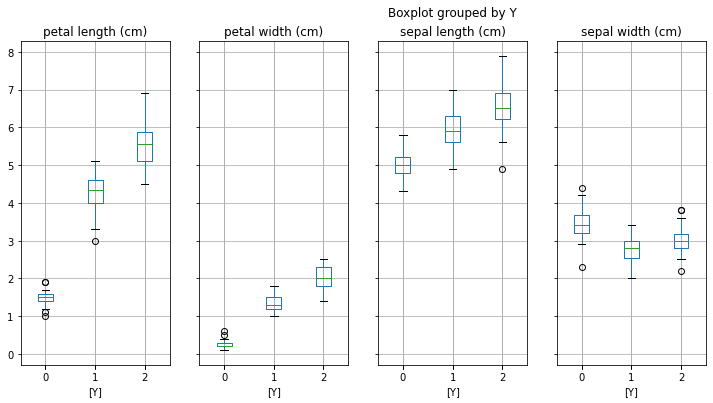

In [8]:
# Use the column that stores the type of flower in by argument
#uncomment below

iris_df.boxplot(by ="Y", layout = (1,5), figsize=(15,6) )

plt.show()


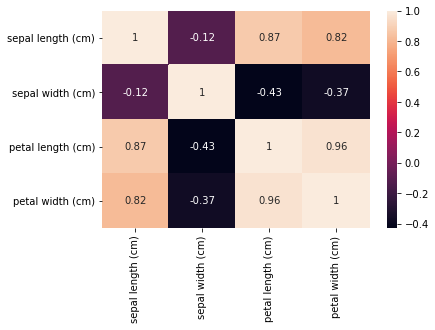

In [9]:
sns.heatmap(iris_df[column_names].corr(), annot = True)




### 4. Generate the covariance heatmap (2 marks)



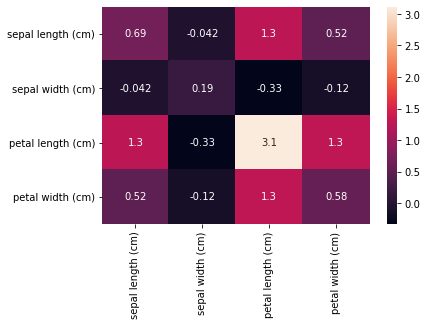

In [10]:
#Your code here
sns.heatmap(iris_df[column_names].cov(), annot = True)


### 5. Implement PCA with two components (5 marks)
- Import and initialise the PCA object with 2 components (2 marks)
- Transform the data with relevant column only.(2 marks)
- Give names 'X1' and 'X2' to the columns (1 mark)


In [11]:
# Uncomment below

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)


# Uncomment below

iris_pca = pca.fit_transform(iris_df[column_names])

# Uncomment below
iris_pca = pd.DataFrame(iris_pca)

# Uncomment below
iris_pca.columns = ['X1', 'X2']
iris_pca["target"] = iris_y



In [12]:
#transformed data sample
iris_pca.head(3)



,X1,X2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0


### 6. Write a function that takes the the embedding dataframe like above and generate a scatterplot with target column as the hue.(5 marks)

In [22]:
# A function that takes a dataframe of embeddings.

#Uncomment below

def plot_scatter(iris_pca):
    
 plt.figure(figsize = (7,7))
 sns.scatterplot(
    x="X1", y="X2",
    hue="target",
    data=iris_pca,
    legend="full",
    alpha=0.3)

### 7. Call the above function with the pca embedding dataset to generate the visualisation(2 marks)

PCA embeddings visualised over target types



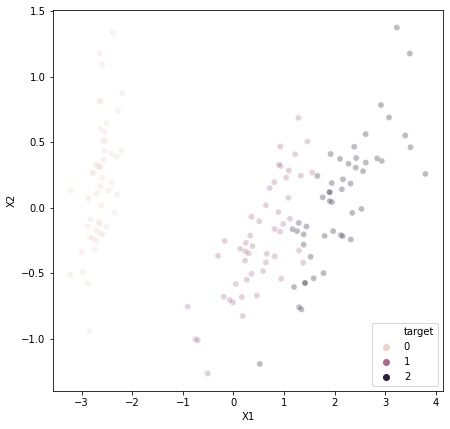

In [23]:
# Uncomment below
print("PCA embeddings visualised over target types")
print()

plot_scatter(iris_pca)


### 8. Initialise tSNE with 2 components and generate the plot by calling the above function (3 marks)

 - Generate the embeddings (1)
 - Create the requried dataframe (1)
 - Call the above defined function (1)

In [24]:
# Uncomment below
# initialise the tSNE object
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)



# fit and transform and generate the required dataframe

iris_tsne = tsne.fit_transform(iris_df[column_names])
iris_tsne = pd.DataFrame(iris_tsne) 

# assign column names and add target column
iris_tsne.columns = ['X1', 'X2']
iris_tsne["target"] = iris_y


# call the function above for tsne results

def plot_scatter(iris_tsne):

    plt.figure(figsize = (7,7))
    sns.scatterplot(
    x="X1", y="X2",
    hue="target",
    data=iris_tsne,
    legend="full",
    alpha=0.3)
    
# print("tSNE embeddings visualized over target types")
# -----------call the plotting function here-------------



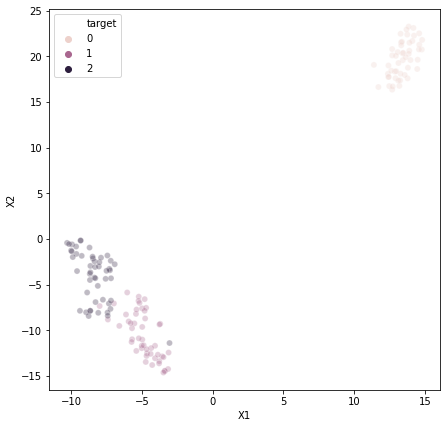

In [25]:
plot_scatter(iris_tsne)